<a href="https://colab.research.google.com/github/LuisGDP1711/PDSeI_Deteccion_Peso_Cuyes/blob/main/Practicas/P01_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch

## Instalaciones

In [ ]:
!pip install torch
!pip install torchvision

## Importar dependencias

In [ ]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable

## Definir Hiperparámetros

In [ ]:
input_size = 784
hidden_size = 500
hidden_size2 = 400
num_classes = 10
num_epochs = 25
batch_size = 200
lr = 1e-3


## Descargando la base de datos FashionMNIST

In [ ]:
train_data = dsets.FashionMNIST(root = './data', train = True,
                        transform = transforms.ToTensor(), download = True)

test_data = dsets.FashionMNIST(root = './data', train = False,
                       transform = transforms.ToTensor())

## Leyendo la data

In [ ]:
train_gen = torch.utils.data.DataLoader(dataset = train_data,
                                             batch_size = batch_size,
                                             shuffle = True)

test_gen = torch.utils.data.DataLoader(dataset = test_data,
                                      batch_size = batch_size,
                                      shuffle = False)

##Mostrar la base de datos usada

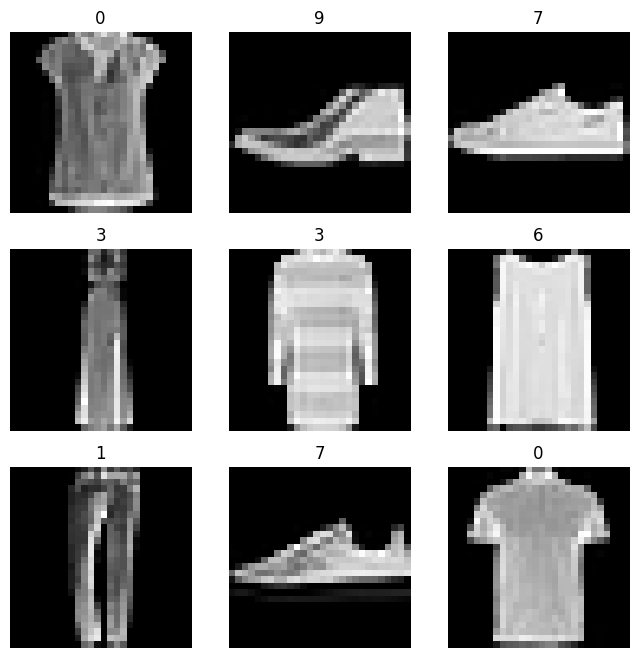

In [ ]:
import matplotlib.pyplot as plt # Para graficar las imágenes + categorías
figure = plt.figure(figsize=(8, 8))
fils, cols = 3, 3

for i in range(1, cols * fils + 1):
    # Escoger una imagen aleatoria
    sample_idx = torch.randint(len(train_data), size=(1,)).item()

    # Extraer imagen y categoría
    img, label = train_data[sample_idx]

    # Dibujar
    figure.add_subplot(fils, cols, i)
    plt.title(str(label)) # Categoría
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray") # Imagen
plt.show()

## Definir modelo

In [ ]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, hidden_size2, num_classes):  # Acepta hidden_size2
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size2)  # Capa adicional con hidden_size2
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out


##Instancia del modelo

In [ ]:
net = Net(input_size, hidden_size, hidden_size2, num_classes)

if torch.cuda.is_available():
    net.cuda()


## Compilación

In [ ]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

## Entrenamiento

In [ ]:
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_gen):
    images = images.view(-1, 28*28).cuda()
    labels = labels.cuda()

    optimizer.zero_grad()
    outputs = net(images)
    loss = loss_function(outputs, labels)
    loss.backward()
    optimizer.step()

    if (i + 1) % 100 == 0:
        print('Epoca [%d/%d], Step [%d/%d], Loss: %.4f'
              % (epoch + 1, num_epochs, i + 1, len(train_data) // batch_size, loss.item()))


Epoca [1/25], Step [100/300], Loss: 0.5694
Epoca [1/25], Step [200/300], Loss: 0.3628
Epoca [1/25], Step [300/300], Loss: 0.3308
Epoca [2/25], Step [100/300], Loss: 0.3543
Epoca [2/25], Step [200/300], Loss: 0.3653
Epoca [2/25], Step [300/300], Loss: 0.3091
Epoca [3/25], Step [100/300], Loss: 0.4229
Epoca [3/25], Step [200/300], Loss: 0.3187
Epoca [3/25], Step [300/300], Loss: 0.3395
Epoca [4/25], Step [100/300], Loss: 0.4103
Epoca [4/25], Step [200/300], Loss: 0.2583
Epoca [4/25], Step [300/300], Loss: 0.2826
Epoca [5/25], Step [100/300], Loss: 0.3304
Epoca [5/25], Step [200/300], Loss: 0.2842
Epoca [5/25], Step [300/300], Loss: 0.2813
Epoca [6/25], Step [100/300], Loss: 0.2481
Epoca [6/25], Step [200/300], Loss: 0.2450
Epoca [6/25], Step [300/300], Loss: 0.2775
Epoca [7/25], Step [100/300], Loss: 0.2238
Epoca [7/25], Step [200/300], Loss: 0.2636
Epoca [7/25], Step [300/300], Loss: 0.2121
Epoca [8/25], Step [100/300], Loss: 0.2425
Epoca [8/25], Step [200/300], Loss: 0.2404
Epoca [8/25

In [ ]:
correct = 0
total = 0
for images, labels in test_gen:
    images = images.view(-1, 28*28).cuda()
    labels = labels.cuda()

    output = net(images)
    _, predicted = torch.max(output, 1)
    correct += (predicted == labels).sum()
    total += labels.size(0)

print('Accuracy: %.3f %%' % (100 * correct / (total + 1)))

Accuracy: 89.491 %
